In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [157]:
df = pd.read_csv('avocado.csv')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [159]:
#Size of dataset(number of rows, number of columns)
df.shape

(18249, 14)

In [160]:
#Displaying first rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [161]:
# To show statistical summary of the columns of our data
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [162]:
#Checking missing values in dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [163]:
#Displaying the columns in dataset
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')
Categorical Columns:
Index(['Date', 'type', 'region'], dtype='object')


In [164]:
# Выведем количество уникальных значений (уровней) для каждой категориальной переменной
for column in categorical_columns:
    unique_levels = df[column].nunique()
    print(f"Количество уровней в переменной '{column}': {unique_levels}")

Количество уровней в переменной 'Date': 169
Количество уровней в переменной 'type': 2
Количество уровней в переменной 'region': 54


In [165]:
df['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [166]:
# Distribution of target variable
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

Допустим, что это целевая переменная и она рапределена равномерно


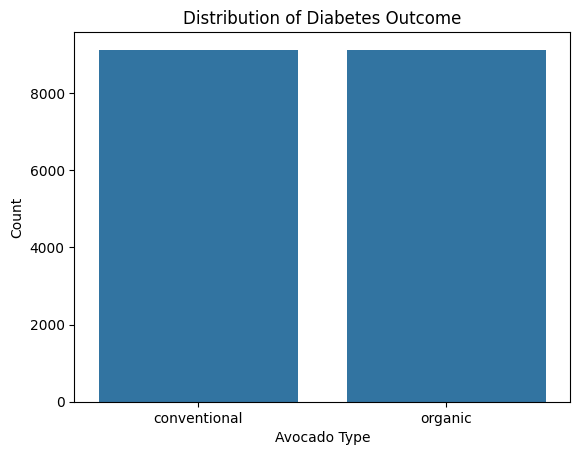

In [167]:
sns.countplot(x="type", data=df)
plt.xlabel("Avocado Type")
plt.ylabel("Count")
plt.title("Distribution of Diabetes Outcome")
plt.show()

In [168]:
df = df.drop('Unnamed: 0',axis=1)

In [169]:
df['type'] = df['type'].map({'organic': 1, 'conventional': 0})

<Figure size 1200x600 with 0 Axes>

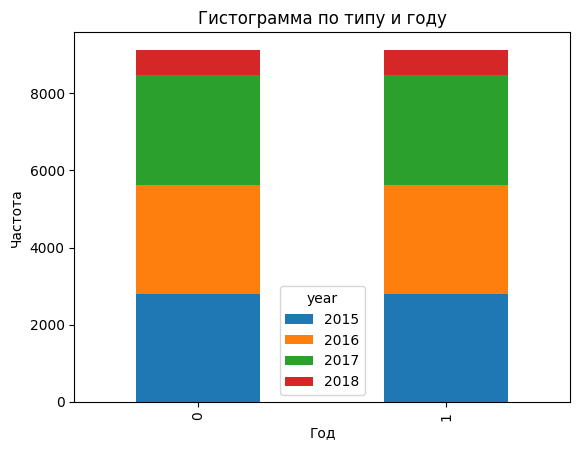

In [170]:
# Группировка по типу и году и подсчет частоты
grouped_data = df.groupby(['type', 'year']).size().unstack()

# Построение гистограммы для каждого типа
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True)
plt.title('Гистограмма по типу и году')
plt.xlabel('Год')
plt.ylabel('Частота')
plt.show()

Заметим, что за 2018 год было меньше всего продукции, а в целом распределено равномерно по каждому году. Ещё удалим признак date, так как он ассоциируется с признаком year

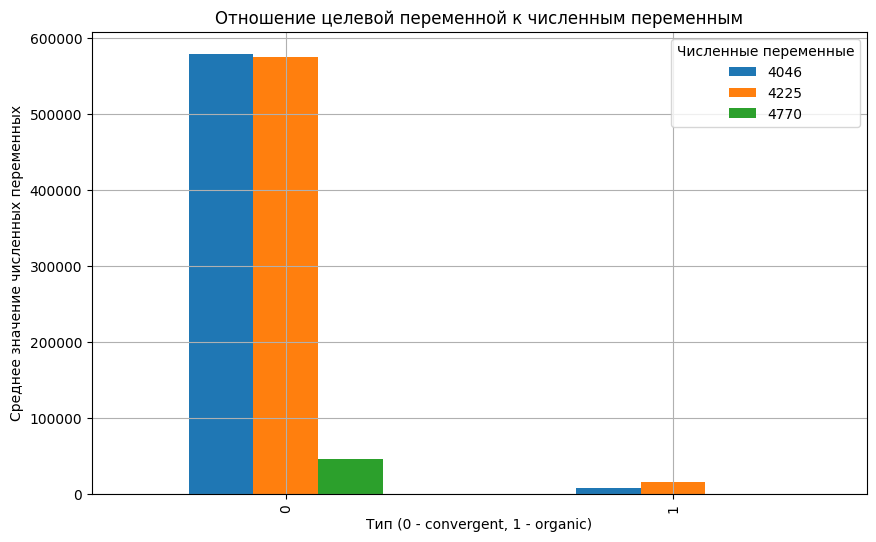

In [171]:


# Группировка по типу и вычисление среднего значения для каждого числового признака
mean_values = df.groupby('type')[['4046', '4225', '4770']].mean()

# Построение столбчатой диаграммы
mean_values.plot(kind='bar', figsize=(10, 6))

# Настройка графика
plt.xlabel('Тип (0 - convergent, 1 - organic)')
plt.ylabel('Среднее значение численных переменных')
plt.title('Отношение целевой переменной к численным переменным')
plt.legend(title='Численные переменные')
plt.grid(True)

# Отображение графика
plt.show()

Видно, что общее количество проданных авокадо organic по стандартам 4056,4225 очень малы, а 4770 вообще не продавались. Зато 'convergent' ушли на улёт

In [172]:
df['year'].value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [173]:
df = df.drop('Date', axis=1)

In [174]:

categorical_columns = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['region'], dtype='object')


In [175]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

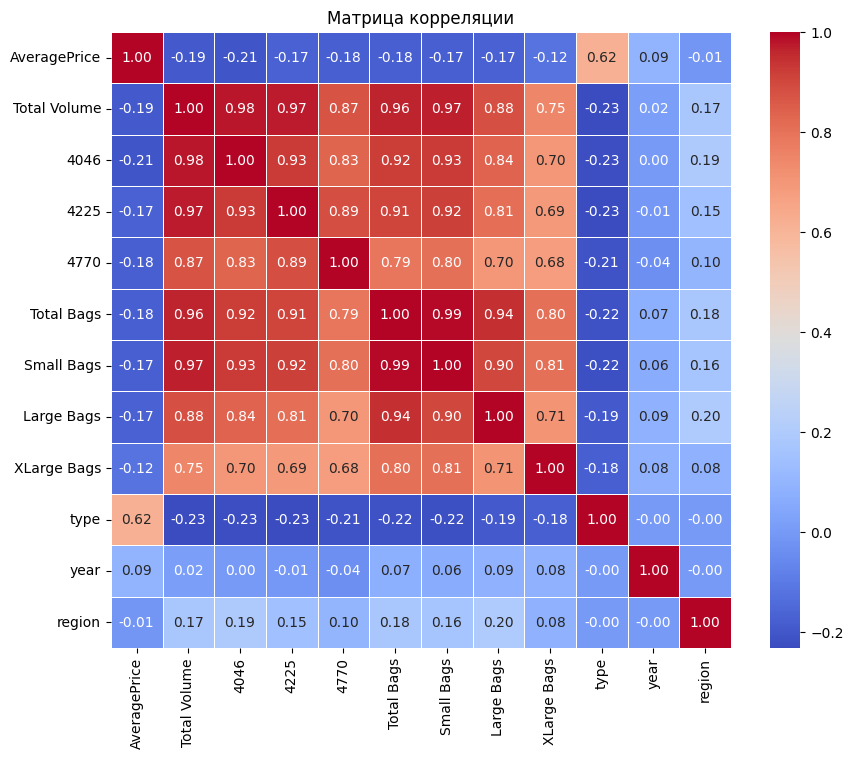

In [176]:

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Визуализация матрицы корреляции с использованием seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции')
plt.show()


In [177]:
# Calculate correlation coefficients
correlation_matrix = df.corr()
print(correlation_matrix)

              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   

              Total Bags  Small Bags 

In [178]:
#Выбираем лучшую корреляцию
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['type'].abs().sort_values(ascending=False)

# Выберите два признака с наибольшей абсолютной корреляцией
top_features = correlation_with_target[1:3].index

# Выведите выбранные признаки
print("Выбранные признаки:", top_features)

Выбранные признаки: Index(['AveragePrice', 'Total Volume'], dtype='object')


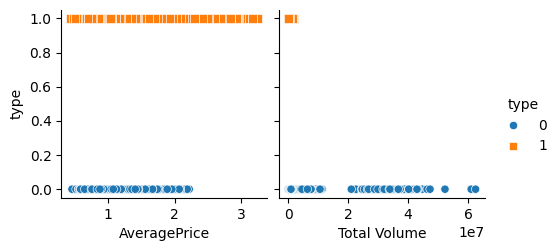

In [179]:

# Create the decision boundary graph
sns.pairplot(df, x_vars=top_features, y_vars='type', hue='type', markers=["o", "s"])
plt.show()

Видим, что средняя цена товара у organic выше, но оъем продаж меньше

In [180]:
from sklearn.model_selection import train_test_split

#Разделим данные

x = df[['AveragePrice', 'Total Volume']]
y = df[['type']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

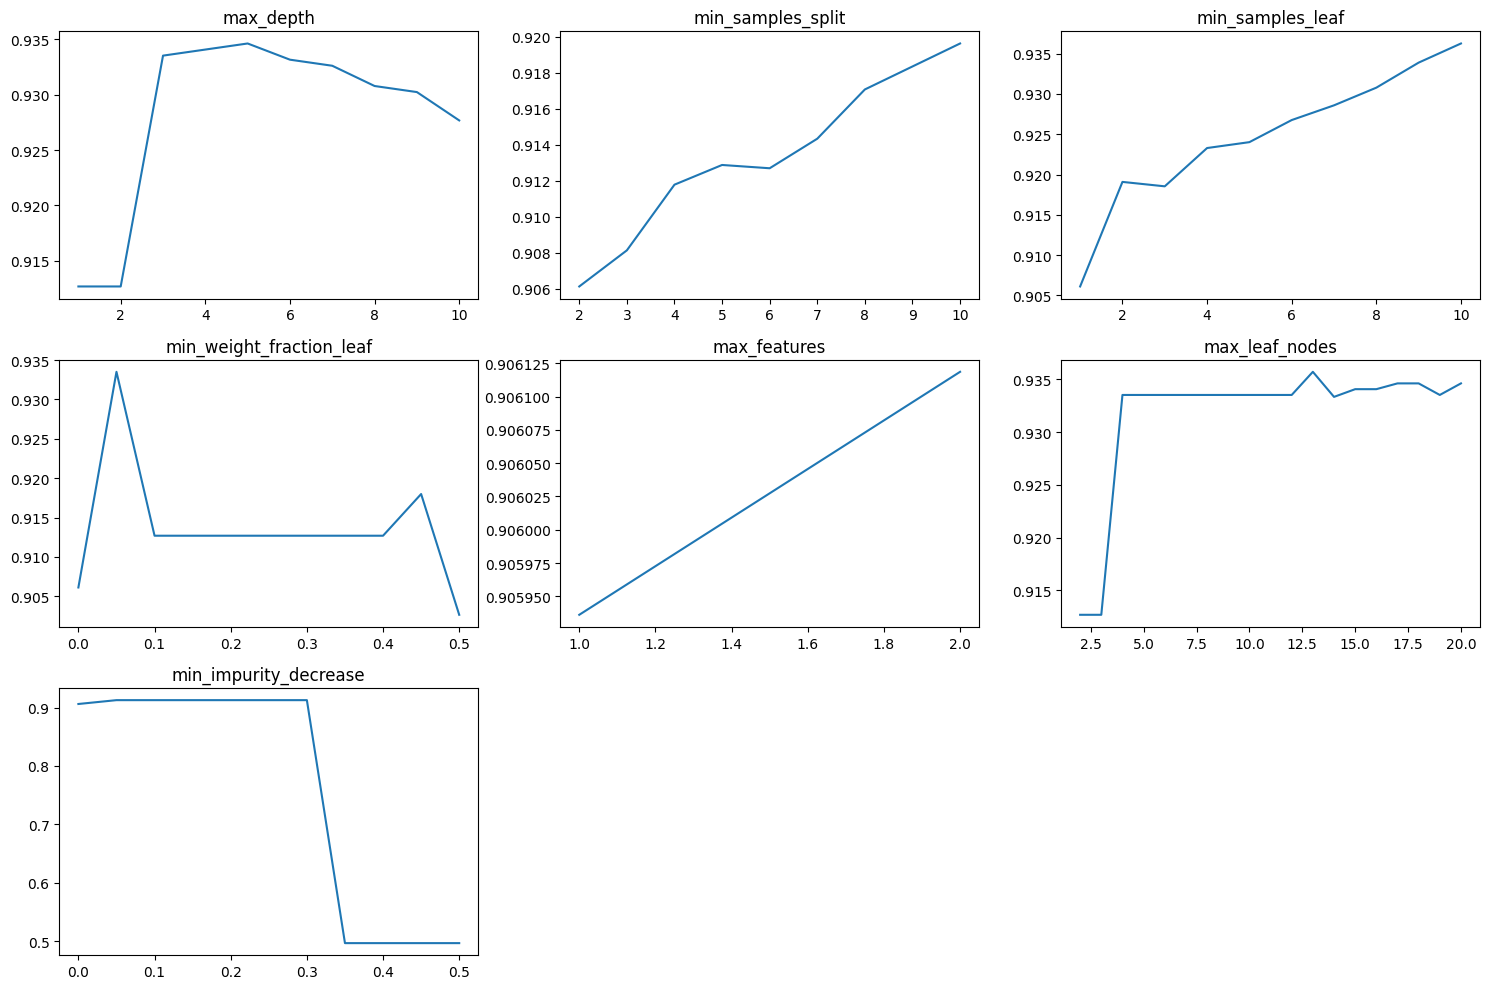

In [181]:
from sklearn.tree import DecisionTreeClassifier

# Списки для хранения результатов точности для разных значений гиперпараметров
hyperparameters = {
    "max_depth": range(1, 11),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    "min_weight_fraction_leaf": np.linspace(0, 0.5, 11),
    "max_features": range(1, x.shape[1] + 1),
    "max_leaf_nodes": range(2, 21),
    "min_impurity_decrease": np.linspace(0, 0.5, 11),
}

# Функция для обучения и оценки точности для разных значений гиперпараметра
def evaluate_hyperparameter(parameter_values, parameter_name, model_type=DecisionTreeClassifier):
    accuracies = []
    for value in parameter_values:
        model = model_type(**{parameter_name: value, "random_state": 42})
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)
        accuracies.append(accuracy)
    return accuracies

# Построение графиков для каждого гиперпараметра
plt.figure(figsize=(15, 10))

for i, (param_name, param_values) in enumerate(hyperparameters.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(param_values, evaluate_hyperparameter(param_values, param_name))
    plt.title(param_name)

plt.tight_layout()
plt.show()

В

In [182]:
from sklearn.tree import DecisionTreeRegressor

best_DTR = DecisionTreeRegressor(max_depth=5,
                                                         min_samples_split=10,
                                                         min_samples_leaf=10,
                                                         min_weight_fraction_leaf=0,
                                                         max_features=2,
                                                         max_leaf_nodes=13,
                                                         min_impurity_decrease=0,
                                                         random_state=42)
best_DTR.fit(x_train, y_train)
best_model_DecisionTreeClassifier = DecisionTreeClassifier()

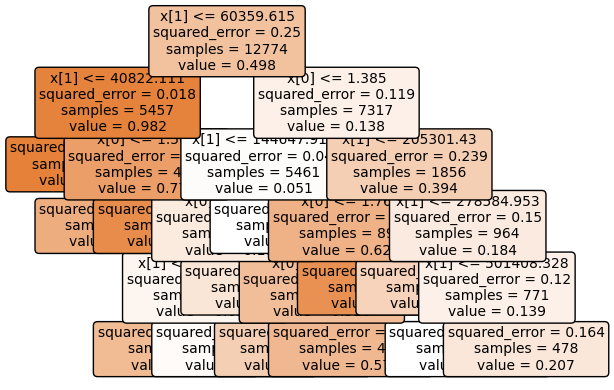

In [183]:
from sklearn.tree import plot_tree

plot_tree(best_DTR, filled=True, rounded=True, fontsize=10)
plt.show()

#Random forest

In [184]:
from sklearn.ensemble import RandomForestClassifier


x = df[['AveragePrice', 'Total Volume']]
y = df[['type']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Создание и обучение модели случайного леса
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

D:\Sigmoid home_task\RandomForest\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 1.6 MB


In [188]:

# Визуализация границ принятия решений
h = .02  # Шаг сетки
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

print(x_min)
print(y_min)
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Получение предсказаний для каждой точки в сетке
#Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])


InvalidIndexError: (slice(None, None, None), 0)

In [ ]:

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Отображение границ принятия решений
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

In [ ]:

# Отображение точек данных
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Plot for Random Forest')
plt.show()